# Coursera ML - Week 8

https://www.coursera.org/learn/machine-learning/home/week/8

# Clustering

unsupervised learning

## Applications
- Market segmentation
- Social network analysis
- Organize computing clusters
- Astronomical data analysis

## K-Means Algorithm
most popular and widely used

Inputs:

 - $K$ (number of clusters)
 - Training set $\{x^{(1)}, \dots, x^{(m)}\}$, $x^{(i)}\in \mathbb{R}^n$
 
1. Init $K$ cluster centroids randomly
2. **Cluster assignment**: Assign each point to cluster (by proximity to centroid)
3. **Move centroids**: move each centroid $i$ to mean of all points in cluster $i$
4. **Iterate until convergence**



### K-means for non-separated clusters

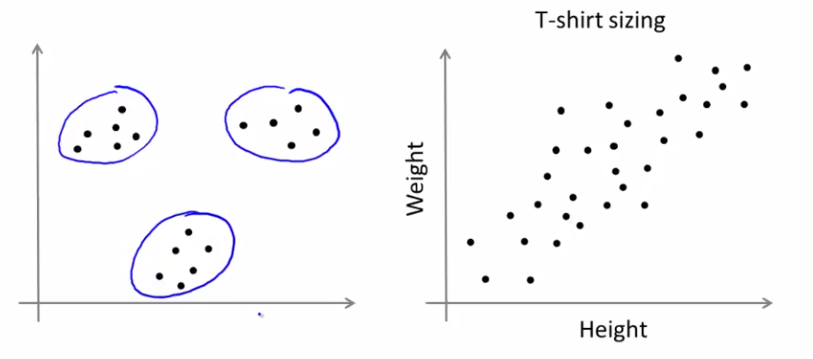

Can still separate into $K$ suitable clusters

### Optimization objective
$c^{(i)}\in \{1,2,\dots, K\}$: cluster to which $x^{(i)}$ is assigned

$\mu_k \in \mathbb{R}^n$: centroid of cluster $k \in \{1,2,\dots, K\}$

$\mu_{c^{(i)}}$: centroid of cluster to which $x^{(i)}$ is assigned

Cost function:

$$J(c^{(i)}, \mu_k) = \frac{1}{m}\sum_{i=1}^m \left|x^{(i)}-\mu_{c^{(i)}}\right|^2$$

minimize $J$ w.r.t. $c^{(1)}, \dots, c^{(m)}, \mu_1, \dots, \mu_K$

also known as *distortion function*

**cluster assignment** minimizes wrt $c^{(i)}$ at fixed $\mu_k$

**move centroids** minimizes wrt $\mu_k$ at fixed $c^{(i)}$


### Random initialization

Should have $K<m$

Randomly pick $K$ training examples and set $\mu_1 \dots \mu_K$ equal to these $K$ examples

### Local optima
Optimum found depends on initialization

Repeat with random initializations and compute cost dunction (distortion) for each optimum

Pick clustering with lowest $J$ - works for smallish $K$ ($\leq 10$)

### Choosing number of clusters $K$

often ambiguous

#### Elbow method
Vary $K$

Plot $J$ vs $K$, look for change in slope

Often, no well-defined kink

## Dimensionality Reduction
### Motivation 1: Data Compression

Two features strongly correlated/redundant

Reduce number of features/project to a lower dimensionality

$$x^{(i)} \in \mathbb{R}^n \rightarrow z^{(i)} \in \mathbb{R}^k $$
$k < n$

### Motivation 2: Data Visualization

$k = 2$ or $k = 3$ for plotting

### Principal Component Analysis (PCA)

(Perform mean normalization and feature scaling first ???)

**Principle:** Find vector/subspace onto which to project the data so as to minimize the projection error

**NB** different to linear fitting!!! (error in $y$ vs. error in normal distance)

#### Data pre-processing

* mean normalization
  - $\mu_j = \frac{1}{m}\sum_{i=1}^m x_j^{(i)}$
  - $x_j^{(i)} \rightarrow x_j^{(i)} - \mu_j$
* feature scaling (scale to have comparable range of values)
  - $x_j^{(i)} \rightarrow \frac{x_j^{(i)} - \mu_j}{s_j}$
  
#### Algorithm
1. Compute covariance matrix ($n\times n$)
$$\Sigma = \frac{1}{m}\sum_{i=1}^n x^{(i)} \left( x^{(i)} \right)^T$$
```octave
Sigma = (1/m)*X'*X;
```
2. Compute singular value decomposition
```octave
[U,S,V] = svd(Sigma);
```
(or use `eig` to get eigenvectors)
3. Use first $k$ columns of
$$U = \left[ u^{(1)}, \dots, u^{(n)}\right]$$
to get reduced $U$ and compute
$$Z = \left[ u^{(1)}, \dots, u^{(k)}\right]^T X$$
```octave
Ureduce = U(:, 1:k);
z = Ureduce'*X;
```

### Reconstruction from Compressed Representation

$$z = U^T_\mathrm{reduce}x$$

Approx. inverse:
$$x_\mathrm{approx} = U_\mathrm{reduce}z$$

### Choosing number or Principal Components
Avg squared projection error:
$$PE = \frac{1}{m}\sum_{i=1}^m\left| x^{(i)} - x^{(i)}_\mathrm{approx} \right|^2$$

Total variation in the date:
$$TV = \frac{1}{m}\sum_{i=1}^m\left| x^{(i)} \right|^2$$

Typicall, choose $k$ to be smallest value such that:
$$\frac{PE}{TV}\leq 0.01$$
"99% of variance is retained" (or 95%. 90% etc.)

#### Algorithm - brute force
Try $k=1$, $k=2$, etc.

#### Algorithm - in practice
```octave
[U,S,V] = svd(Sigma);
```
$S$ = diagonal matrix.
For given $k$,
$$\frac{PE}{TV} = 1 - \frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^n S_{ii}}$$

### Advice for Applying PCA

#### Supervised learning speadup

Training set $(x^{(i)}, y^{(i)})$  with large # features, say $x^{(i)} \in \mathbb{R}^{10000}$

Very slow to train!

Extract inouts (unlabelled set):
$$x^{(i)}, \dots, x^{(m)} \in \mathbb{R}^{10000}$$
After PCA:
$$z^{(i)}, \dots, z^{(m)} \in \mathbb{R}^{1000}$$

New training set: $(z^{(i)}, y^{(i)})$  
E.g. $h_\theta(z) = \frac{1}{1+e^{-\theta^T z}}$

PCA defines mapping $x^{(i)} \rightarrow z^{(i)}$ **from running PCA on training set only!!!**

**Use same mapping as a pre-processor on any test/validation $x$**

#### Bad use of PCA
##### To prevent overfitting
Use regularization instead!!!

##### Part of ML system design
Try using original/raw data first!

## [Slides](Slides14.pdf)

### Try svd/PCA for fitting

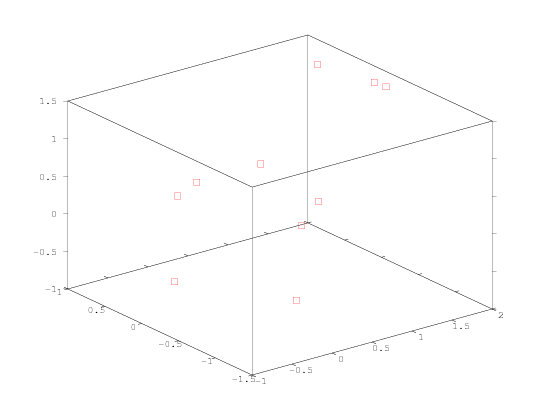

In [16]:
n = 10;
x = randn(1, n);
y = randn(1, n);
z = 0.8*x + 0.2*y + 0.1*randn(1, n);
plot3(x, y, z, 'rs')

In [17]:
X = [x;y;z];
Sigma = 1/n*X*X';
[U, S, V] = svd(Sigma)

U =

  -0.780434   0.135005  -0.610488
  -0.035384  -0.984382  -0.172455
  -0.624236  -0.112989   0.773022

S =

Diagonal Matrix

   1.8075456           0           0
           0   0.3239227           0
           0           0   0.0042663

V =

  -0.780434   0.135005  -0.610488
  -0.035384  -0.984382  -0.172455
  -0.624236  -0.112989   0.773022



In [18]:
U(:, 3)/U(3, 3)

ans =

  -0.78974
  -0.22309
   1.00000

